In [143]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
conn = sql.connect('database.sqlite')
conn

### Q # 1
What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [148]:
def sql_query(q):
    return pd.read_sql_query(q,conn)

In [150]:
q = '''select * froM Salaries'''

sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [151]:
q = '''select jobtitle, avg(TotalPayBenefits) as TotalPayBenefits from Salaries where jobtitle != 'Not provided' and jobtitle != 'Not Provided'
group by jobtitle
'''

sql_query(q)

,JobTitle,TotalPayBenefits
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
4,ACUPUNCTURIST,67594.400000
...,...,...
2153,X-RAY LABORATORY AIDE,52705.880385
2154,X-Ray Laboratory Aide,69521.123200
2155,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2156,Youth Comm Advisor,60118.550000


### Q # 2
Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [153]:
q = '''select jobtitle, count(EmployeeName) , Year from Salaries where jobtitle != 'Not provided' and jobtitle != 'Not Provided'
group by Year,jobtitle
'''

sql_query(q)

,JobTitle,count(EmployeeName),Year
0,ACCOUNT CLERK,83,2011
1,ACCOUNTANT,5,2011
2,ACCOUNTANT INTERN,48,2011
3,ACUPUNCTURIST,1,2011
4,ADMINISTRATIVE ANALYST,93,2011
...,...,...,...
4131,Wire Rope Cable Maint Sprv,1,2014
4132,Worker's Comp Supervisor 1,6,2014
4133,Worker's Compensation Adjuster,26,2014
4134,X-Ray Laboratory Aide,35,2014


### Q # 3
What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [155]:
q = '''select DISTINCT(EmployeeName) from Salaries where EmployeeName != 'Not provided' and EmployeeName != 'Not Provided'
group by EmployeeName
'''

sql_query(q)

,EmployeeName
0,A BERNARD FATOOH
1,A Bernard Fatooh
2,A Bernard Fatooh
3,A ELIZABETH MARCHASIN
4,A JAMIL NIAZI
...,...
110804,Zun Jin Zhang He
110805,Zuna Luu
110806,Zuna T Luu
110807,Zuri Jones


### Q # 4 
Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [158]:
q = '''select * from Salaries where TotalPayBenefits != 'Not provided' and TotalPayBenefits != 'Not Provided'
ORDER BY TotalPayBenefits desc
'''

sql_query(q)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,110532,David Shinn,Deputy Chief 3,129150.01,0,342802.63,38780.04,471952.64,510732.68,2014,,San Francisco,PT
3,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,,San Francisco,FT
4,110534,William J Coaker Jr.,Chief Investment Officer,257340,0,82313.7,96570.66,339653.70,436224.36,2014,,San Francisco,PT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148650,110529,Timothy E Gibson,Police Officer 3,,0,0,-2.73,0.00,-2.73,2013,,San Francisco,
148651,110530,Mark E Laherty,Police Officer 3,,0,0,-8.2,0.00,-8.20,2013,,San Francisco,
148652,110531,David P Kucia,Police Officer 3,,0,0,-33.89,0.00,-33.89,2013,,San Francisco,


### Q # 5
Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [160]:
q = '''SELECT * FROM Salaries WHERE TotalPayBenefits != 'Not provided' AND TotalPayBenefits != 'Not Provided' 
AND TotalPayBenefits BETWEEN 125000 AND 150000 AND  JobTitle = 'Firefighter'
'''

sql_query(q)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,44540,Randall Henderson,Firefighter,58564.00,24847.86,43458.06,21042.83,126869.92,147912.75,2012,,San Francisco,
1,44554,Virginia Cheung,Firefighter,101379.60,0.00,12353.42,34129.12,113733.02,147862.14,2012,,San Francisco,
2,44577,Travis Hemenez,Firefighter,83546.57,17897.68,12900.30,33319.57,114344.55,147664.12,2012,,San Francisco,
3,44615,Gail Readdie,Firefighter,83386.40,19715.60,11353.05,32997.12,114455.05,147452.17,2012,,San Francisco,
4,44650,Gregory Ginotti,Firefighter,83546.57,22417.40,8597.70,32654.80,114561.67,147216.47,2012,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,123134,Stephen J Kloster,Firefighter,80003.76,6747.13,10438.76,29594.48,97189.65,126784.13,2014,,San Francisco,PT
111,123150,Jeffrey D Ryan,Firefighter,72348.75,9340.89,10815.28,34182.21,92504.92,126687.13,2014,,San Francisco,FT
112,123239,Jovan R Blake,Firefighter,72348.75,7747.96,10699.89,35373.02,90796.60,126169.62,2014,,San Francisco,FT
113,123341,Dino M Cafferata,Firefighter,73002.98,5981.80,10944.68,35751.06,89929.46,125680.52,2014,,San Francisco,FT


### Q # 6
How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')

In [163]:
q = '''SELECT COUNT(*) 
FROM Salaries 
WHERE (OvertimePay = 0 AND OvertimePay != 'Not provided' AND OvertimePay != 'Not Provided') 
  AND (OtherPay = 0 AND OtherPay != 'Not provided' AND OtherPay != 'Not Provided')
'''

sql_query(q)

,COUNT(*)
0,34655


### Q# 7
Show top 10 employees having (overtimepay+OtherPay) in bar plot?  exclude ('Not Provided', 'Not provided')

In [165]:
q = '''SELECT EmployeeName, OvertimePay, OtherPay, (OvertimePay + OtherPay) AS TotalPay
FROM Salaries
ORDER BY TotalPay DESC
LIMIT 10
'''

sql_query(q)

,EmployeeName,OvertimePay,OtherPay,TotalPay
0,NATHANIEL FORD,0.00,400184.25,400184.25
1,GARY JIMENEZ,245131.88,137811.38,382943.26
2,David Shinn,0.00,342802.63,342802.63
3,CHRISTOPHER CHONG,56120.71,198306.90,254427.61
4,John Goldberg,0.00,245999.41,245999.41
5,Gary Altenberg,220909.48,13126.31,234035.79
6,Khoa Trinh,146415.32,78057.41,224472.73
7,ALSON LEE,89062.90,134426.14,223489.04
8,Brendan A Ward,53142.28,163495.64,216637.92
9,Whitney P Yee,196689.18,16622.66,213311.84


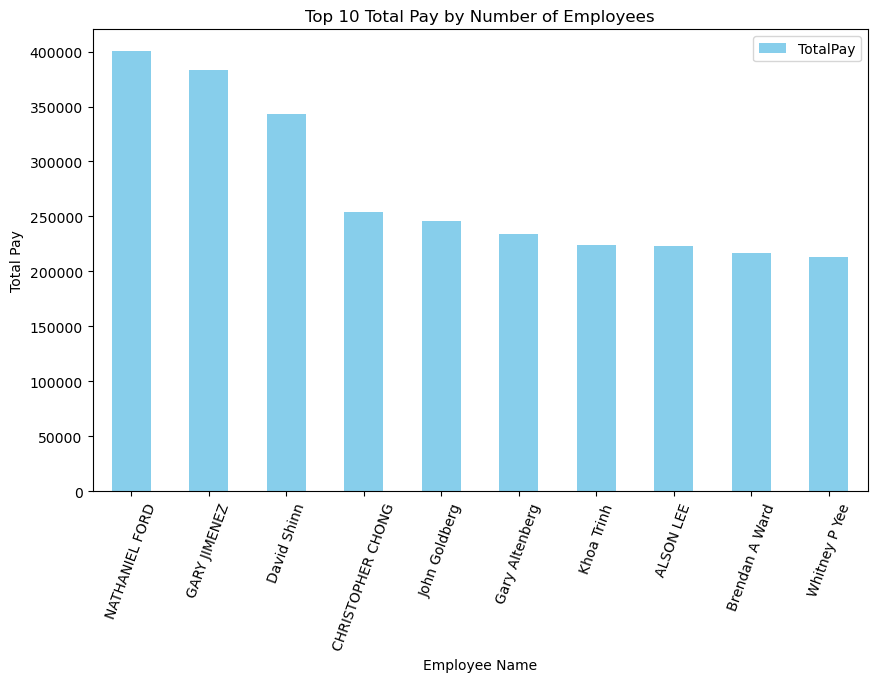

In [196]:
a = pd.read_sql_query(q, conn)
a.plot(kind='bar', x='EmployeeName', y='TotalPay', color='skyblue', figsize=(10, 6))

plt.xlabel('Employee Name')
plt.xticks(rotation = 70)
plt.ylabel('Total Pay')
plt.title('Top 10 Total Pay by Number of Employees')

plt.show()

### Q # 8
Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')

In [216]:
q = '''SELECT 
    AVG(BasePay) AS 'Avg Base Pay',
    AVG(OvertimePay) AS 'Avg Over time Pay',
    AVG(OtherPay) AS 'Avg Other Pay'
FROM Salaries
'''


sql_query(q)

,Avg Base Pay,Avg Over time Pay,Avg Other Pay
0,66053.729288,5065.923568,3648.669115


In [218]:
avg_basepay = 66053.729288  
avg_overtimepay = 5065.923568 
avg_otherpay = 3648.669115  

labels = ['BasePay', 'OvertimePay', 'OtherPay']
values = [avg_basepay, avg_overtimepay, avg_otherpay]

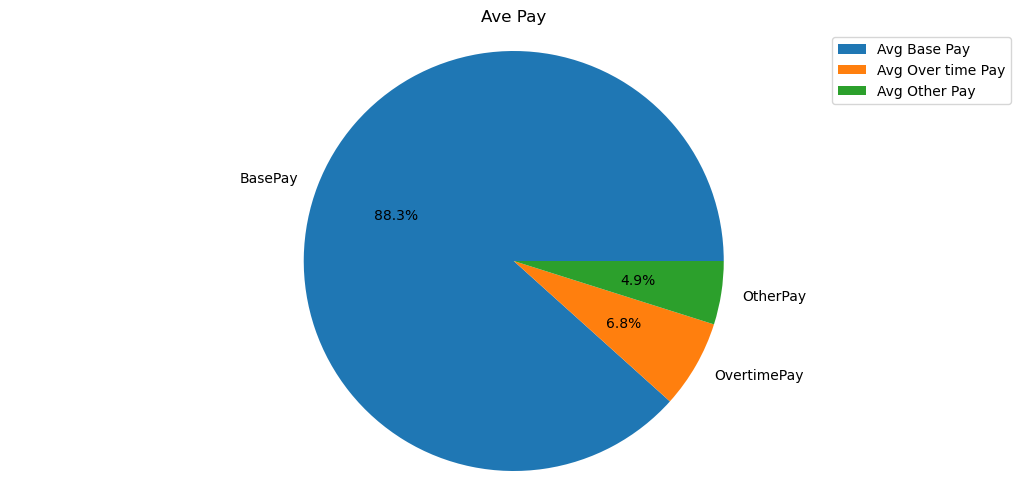

In [234]:
plt.figure(figsize = (13,6))
plt.pie(values, labels = labels, autopct = '%1.1f%%')
plt.legend(labels = labels_for_company, loc = 'upper right')
plt.axis('equal')
plt.title("Ave Pay")
plt.show()


# plt.figure(figsize=(7,7))
# plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
# plt.title('Average Pay Distribution for All Employees')
# plt.show()

### Q # 9
 Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')

In [242]:
q = '''SELECT JobTitle, AVG(TotalPayBenefits) AS AvgTotalPayBenefits
FROM Salaries
GROUP BY JobTitle
HAVING AVG(TotalPayBenefits) > 75000
'''


sql_query(q)

,JobTitle,AvgTotalPayBenefits
0,"ACPO,JuvP, Juv Prob (SFERS)",80266.370000
1,ADMINISTRATIVE ANALYST III,92698.515000
2,ADMINISTRATIVE ENGINEER,127961.430000
3,ADMINISTRATIVE SERVICES MANAGER,77015.580000
4,"ADMINISTRATOR, SFGH MEDICAL CENTER",257124.440000
...,...,...
1432,Window Cleaner Supervisor,108550.543333
1433,Wire Rope Cable Maint Mechanic,138837.434333
1434,Wire Rope Cable Maint Sprv,242118.323333
1435,Worker's Comp Supervisor 1,96125.531429


### Q # 10
Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10?  exclude ('Not Provided', 'Not provided')

In [249]:
q = '''SELECT JobTitle, COUNT(EmployeeName) AS EmployeeCount
FROM Salaries
GROUP BY JobTitle
HAVING COUNT(EmployeeName) > 10
'''


sql_query(q)

,JobTitle,EmployeeCount
0,ACCOUNT CLERK,83
1,ACCOUNTANT INTERN,48
2,ADMINISTRATIVE ANALYST,93
3,AIRPORT COMMUNICATIONS OPERATOR,27
4,AIRPORT ECONOMIC PLANNER,13
...,...,...
1151,Wire Rope Cable Maint Mechanic,30
1152,Worker's Comp Supervisor 1,14
1153,Worker's Compensation Adjuster,74
1154,X-RAY LABORATORY AIDE,26
